## Observations and Insights

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")
combined_df = pd.DataFrame(combined_data)

combined_df.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean_volume = pd.DataFrame(round(combined_data.groupby(["Drug Regimen"]).mean()['Tumor Volume (mm3)'],2))
mean_volume = mean_volume.rename(columns={"Tumor Volume (mm3)":"Mean"})

median_volume=pd.DataFrame(round(combined_data.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"],2))
median_volume=median_volume.rename(columns={"Tumor Volume (mm3)":"Median"})

variance=pd.DataFrame(round(combined_data.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"],2))
variance=variance.rename(columns={"Tumor Volume (mm3)":"Variance"})

std_dev=pd.DataFrame(round(combined_data.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"],2))
std_dev=std_dev.rename(columns={"Tumor Volume (mm3)":"Standard Deviation"})

sem = pd.DataFrame(round(combined_data.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"],2))
sem = sem.rename(columns={"Tumor Volume (mm3)": "SEM"})

summary=[mean_volume, median_volume, variance, std_dev, sem]
summary=pd.concat(summary, axis=1, join="inner")
summary

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.85,42.35,6.51,0.51
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [3]:
statistics = pd.DataFrame(round(combined_data.groupby(["Drug Regimen"]).describe()["Tumor Volume (mm3)"],2))
statistics

,count,mean,std,min,25%,50%,75%,max
Drug Regimen,,,,,,,,
Capomulin,230.0,40.68,4.99,23.34,37.69,41.56,45.00,48.16
Ceftamin,178.0,52.59,6.27,45.00,47.21,51.78,56.80,68.92
Infubinol,178.0,52.88,6.57,36.32,47.31,51.82,57.31,72.23
Ketapril,188.0,55.24,8.28,45.00,48.23,53.70,60.87,78.57
Naftisol,186.0,54.33,8.13,45.00,47.29,52.51,59.96,76.67
Placebo,181.0,54.03,7.82,45.00,47.46,52.29,59.92,73.21
Propriva,161.0,52.32,6.51,45.00,47.08,50.85,56.18,72.46
Ramicane,228.0,40.22,4.85,22.05,36.67,40.67,45.00,47.62
Stelasyn,181.0,54.23,7.71,45.00,48.05,52.43,58.72,75.12


## Bar plots

Text(0, 0.5, 'Tumor Volume (mm3)')

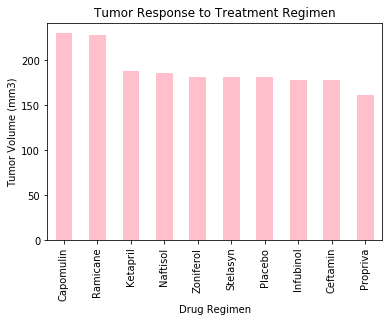

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
treatment = combined_data["Drug Regimen"].value_counts()
treatment_bar= treatment.plot(kind="bar",facecolor="pink")

plt.title("Tumor Response to Treatment Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume (mm3)")



<function matplotlib.pyplot.show(*args, **kw)>

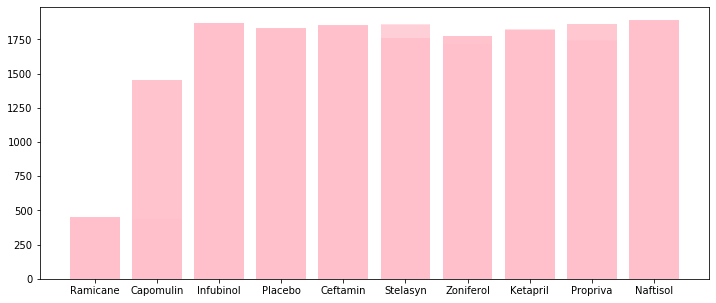

In [5]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
x_axis=np.arange(len(combined_data))

plt.figure(figsize=(12,5))
plt.bar(combined_data["Drug Regimen"], x_axis, color="pink", alpha=0.5, align="center")
plt.show

## Pie plots

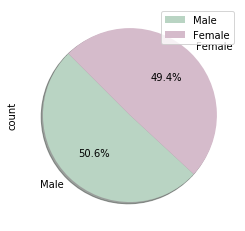

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_gender = pd.DataFrame(combined_data["Sex"].value_counts())

colors = ["#b9d4c3","#d5bbcb"]
gender_df=pd.DataFrame({"count":[958,935]}, index=["Male", "Female"])
gender_pie = gender_df.plot.pie(y="count", figsize=(4,4), autopct="%1.1f%%", shadow=2, colors=colors, startangle=135)

/Users/georgialeigh/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


([<matplotlib.patches.Wedge at 0x1a18ed1b50>,
 [Text(-0.8252453793429938, -0.8573622710809231, 'Male'),
  Text(0.7628318632582293, 0.7925197463773243, 'Female')],
 [Text(-0.47850362331652574, -0.497126022727594, '50.6%'),
  Text(0.4160901072317614, 0.432283498023995, '49.4%')])

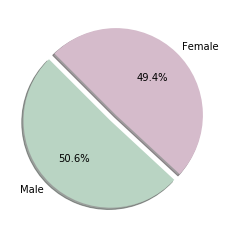

In [7]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_disty = pd.DataFrame(combined_data["Sex"].value_counts())
labels = ["Male", "Female"]
explode=(0.09, 0)
colors = ["#b9d4c3","#d5bbcb"]
plt.pie(gender_disty, explode=explode, colors=colors, labels=labels, autopct="%1.1f%%", shadow=True, startangle=135)

## Quartiles, outliers and boxplots

In [8]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
promising_drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Slice the original combined_data dataframe using the list of four drugs
promising_drugs = combined_data[combined_data['Drug Regimen'].isin(promising_drugs)]

# View the newly created subset dataframe
promising_drugs.head()

# Groupby 'Mouse ID' and use the .agg method
four_last_tumor = promising_drugs.groupby(['Drug Regimen','Mouse ID']).agg(\
# Get the last value of the 'Tumor Volume (mm3)' column using a lambda function selecting the element in -1 position
last_tumor_size=('Tumor Volume (mm3)',lambda x: x.iloc[-1])).round(3)

four_last_tumor

last_tumor_size
Drug Regimen Mouse ID                 
Capomulin    b128               38.983
             b742               38.940
             f966               30.486
             g288               37.074
             g316               40.159
...                                ...
Ramicane     s508               30.276
             u196               40.668
             w678               43.166
             y449               44.183
             z578               30.639

[100 rows x 1 columns]

In [9]:
# Reshape dataframe to show drug regimens as columns
four_last_tumor_new = four_last_tumor.stack(level=0).unstack(level=0)
four_last_tumor_new.head()

,Drug Regimen,Capomulin,Ceftamin,Infubinol,Ramicane
Mouse ID,,,,,
a203,last_tumor_size,NaN,NaN,67.973,NaN
a251,last_tumor_size,NaN,NaN,65.526,NaN
a275,last_tumor_size,NaN,62.999,NaN,NaN
a411,last_tumor_size,NaN,NaN,NaN,38.408
a444,last_tumor_size,NaN,NaN,NaN,43.048


In [10]:
#Calculate the IQR and quantitatively determine if there are any potential outliers.

# Set counter to 0 which is used to only print dividing line at top of output
counter = 0

# Do quartile calculations for each drug
for drug in promising_drugs:
    quartiles = four_last_tumor_new[drug].quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq-lowerq,2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)
    
    # Check if it is the first time through the for loop, if so then print dividing line at top only
    if counter == 0:
        print(f"--------------------------------------------------------")
    print(f"{drug} IQR data is:")
    print(f"The lower quartile of {drug} is: {lowerq}")
    print(f"The upper quartile of {drug} is: {upperq}")
    print(f"The interquartile range of {drug} is: {iqr}")
    print(f"The the median of {drug} is: {quartiles[0.5]} ")
    print(f"Values below {lower_bound} for {drug} could be outliers.")
    print(f"Values above {upper_bound} for {drug} could be outliers.")
    print(f"--------------------------------------------------------")
    counter += 1

KeyError: 'Mouse ID'

In [12]:
# Create an empty list
boxplot_list = []

# Iterate through the list of the four drugs names using them to select the same column names
# and appending to the boxplot_list
for drug in promising_drugs:
    boxplot_list.append(list(four_last_tumor_new[drug].dropna()))

KeyError: 'Mouse ID'

## Line and scatter plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [ ]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen